Name-RUGVED THAKARE
ID-2023201049

Ventral Temporal 50% random features face vs house

In [86]:
pip install nilearn

In [87]:
from nilearn import datasets
subj4 = datasets.fetch_haxby(subjects=[4])

In [88]:
from nilearn.maskers import NiftiMasker
masker = NiftiMasker(mask_img=subj4['mask_vt'][0],
                     standardize="zscore_sample",
                     detrend=True,
                     high_variance_confounds=True)
time_series = masker.fit_transform(subj4['func'][0])


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [89]:
import pandas as pd
import numpy as np
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'house'], dtype=object)

(1452, 675)
(216, 675)
(216,)


array(['face', 'house'], dtype=object)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

percent_features = 0.5

num_features_to_select = int(X.shape[1] * percent_features)

selected_features_indices = np.random.choice(X.shape[1], num_features_to_select, replace=False)

X_selected = X[:, selected_features_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)

svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)

print(accuracy_score(y_test, predicted))

1.0


In [91]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 10)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 10)


X_train_selected = X_selected[condition_mask_train[condition_mask_array]]
X_test_selected = X_selected[condition_mask_test[condition_mask_array]]
y_train_selected = y[condition_mask_train[condition_mask]]
y_test_selected = y[condition_mask_test[condition_mask]]


svc.fit(X_train_selected, y_train_selected)
predicted_selected = svc.predict(X_test_selected)
print("Accuracy for face vs. house (50% features):", accuracy_score(y_test_selected, predicted_selected))



Accuracy for face vs. house (50% features): 0.8333333333333334


Accuracy for test chunk 0: 1.0
Accuracy for test chunk 1: 1.0
Accuracy for test chunk 2: 1.0
Accuracy for test chunk 3: 1.0
Accuracy for test chunk 4: 1.0
Accuracy for test chunk 5: 0.9444444444444444
Accuracy for test chunk 6: 1.0
Accuracy for test chunk 7: 1.0
Accuracy for test chunk 8: 1.0
Accuracy for test chunk 9: 0.9444444444444444
Accuracy for test chunk 10: 1.0
Accuracy for test chunk 11: 0.8333333333333334

Mean Accuracy: 0.976851851851852
Standard Deviation: 0.04788926126291018


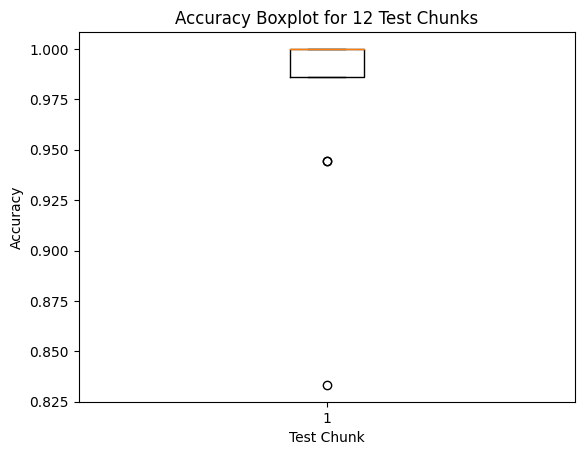

In [92]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()

accuracy_values1 = []

for val in range(12):

    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = X_selected[condition_mask_train[condition_mask_array]]
    X_test_selected = X_selected[condition_mask_test[condition_mask_array]]
    y_train_selected = y[condition_mask_train[condition_mask]]
    y_test_selected = y[condition_mask_test[condition_mask]]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)


    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values1.append(accuracy)

    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values1)
std_accuracy = np.std(accuracy_values1)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values1)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


Ventral temporal 50% random features Face vs Scissors

In [93]:
import pandas as pd
import numpy as np
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, scissors conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "scissors"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'scissors'], dtype=object)

(1452, 675)
(216, 675)
(216,)


array(['face', 'scissors'], dtype=object)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

percent_features = 0.5

num_features_to_select = int(X.shape[1] * percent_features)

selected_features_indices = np.random.choice(X.shape[1], num_features_to_select, replace=False)

X_selected = X[:, selected_features_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)

svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)

print(accuracy_score(y_test, predicted))

0.9166666666666666


In [95]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 6)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 6)


X_train_selected = X_selected[condition_mask_train[condition_mask_array]]
X_test_selected = X_selected[condition_mask_test[condition_mask_array]]
y_train_selected = y[condition_mask_train[condition_mask]]
y_test_selected = y[condition_mask_test[condition_mask]]


svc.fit(X_train_selected, y_train_selected)
predicted_selected = svc.predict(X_test_selected)
print("Accuracy for face vs. scissors (50% features):", accuracy_score(y_test_selected, predicted_selected))



Accuracy for face vs. scissors (50% features): 0.9111111111111111


Accuracy for test chunk 0: 0.9444444444444444
Accuracy for test chunk 1: 0.9444444444444444
Accuracy for test chunk 2: 0.9444444444444444
Accuracy for test chunk 3: 0.9444444444444444
Accuracy for test chunk 4: 1.0
Accuracy for test chunk 5: 0.8888888888888888
Accuracy for test chunk 6: 1.0
Accuracy for test chunk 7: 0.8333333333333334
Accuracy for test chunk 8: 0.6111111111111112
Accuracy for test chunk 9: 1.0
Accuracy for test chunk 10: 0.9444444444444444
Accuracy for test chunk 11: 0.7777777777777778

Mean Accuracy: 0.9027777777777778
Standard Deviation: 0.10906684249434948


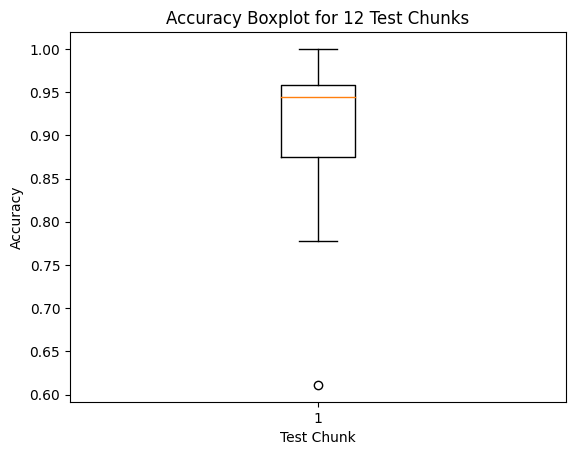

In [96]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()

accuracy_values = []

for val in range(12):

    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = X_selected[condition_mask_train[condition_mask_array]]
    X_test_selected = X_selected[condition_mask_test[condition_mask_array]]
    y_train_selected = y[condition_mask_train[condition_mask]]
    y_test_selected = y[condition_mask_test[condition_mask]]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values.append(accuracy)


    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


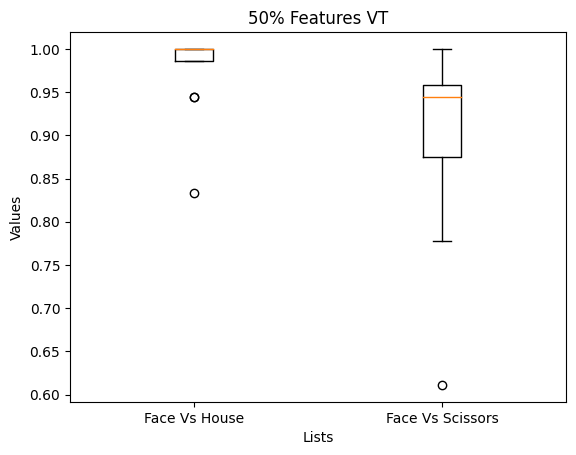

In [98]:
plt.boxplot([accuracy_values1, accuracy_values], labels=['Face Vs House', 'Face Vs Scissors'])

plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('50% Features VT')


plt.show()